<a href="https://colab.research.google.com/github/numphoom12/Location-searching-/blob/main/testproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Mar 14 10:59:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |   8959MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import os
from sklearn.model_selection import train_test_split

2.11.0


In [ ]:
from tensorflow.keras.layers import Dense ,Input ,Flatten  
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img
import numpy as np
from glob import glob

In [ ]:
train_path = '/content/drive/MyDrive/com_civil/train'
valid_path = '/content/drive/MyDrive/com_civil/validation'

In [ ]:
image_size = [180,180]
batch_size = 128

In [ ]:
inception = InceptionV3(input_shape=image_size+[3], weights = 'imagenet', include_top=False)

In [ ]:
for layers in inception.layers :
  layers.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/com_civil/train/*')

In [ ]:
folders

['/content/drive/MyDrive/com_civil/train/com',
 '/content/drive/MyDrive/com_civil/train/civil']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation = 'sigmoid')(x)

In [ ]:
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 89, 89, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 89, 89, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# data_train , data_test = train_test_split(data,radom_state =0 )

train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/com_civil/train',
                                                 target_size = (180,180),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 157 images belonging to 2 classes.


In [ ]:
print(training_set.class_indices)

{'civil': 0, 'com': 1}


In [ ]:
test_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/com_civil/validation',
                                                 target_size = (180,180),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 84 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
10/10 [==============================] - 50s 5s/step - loss: 1.3157 - accuracy: 0.7580 - val_loss: 1.0665 - val_accuracy: 0.8095
Epoch 2/10
10/10 [==============================] - 8s 842ms/step - loss: 0.1520 - accuracy: 0.9490 - val_loss: 0.7175 - val_accuracy: 0.8810
Epoch 3/10
10/10 [==============================] - 9s 1s/step - loss: 0.1218 - accuracy: 0.9745 - val_loss: 0.3030 - val_accuracy: 0.9524
Epoch 4/10
10/10 [==============================] - 9s 980ms/step - loss: 0.0161 - accuracy: 0.9936 - val_loss: 0.5476 - val_accuracy: 0.9286
Epoch 5/10
10/10 [==============================] - 9s 905ms/step - loss: 0.0446 - accuracy: 0.9936 - val_loss: 0.1403 - val_accuracy: 0.9524
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.4859 - val_accuracy: 0.9167
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 0.9762
Epoch 8/10
10/1

In [ ]:
model.evaluate(test_set)

6/6 [==============================] - 3s 456ms/step - loss: 0.1678 - accuracy: 0.9762


[0.16775843501091003, 0.976190447807312]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
# drive.mount('/content/drive/MyDrive/com_civil')
# %cd /content/drive/MyDrive/com_civil/validation

In [ ]:
%cd /content/drive/MyDrive/com_civil/validation/com

/content/drive/MyDrive/com_civil/validation/com


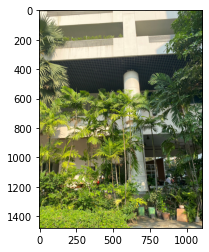

In [ ]:
img = cv2.imread('com.10.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

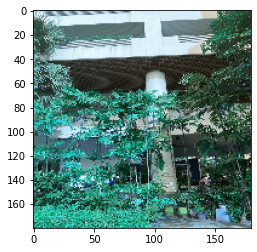

In [ ]:
resize = tf.image.resize(img ,(180,180))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize/255,0).shape

(1, 180, 180, 3)

In [ ]:
test_predict = model.predict(np.expand_dims(resize/255 ,0))
test_predict

1/1 [==============================] - 0s 31ms/step


array([[4.437263e-05, 9.998828e-01]], dtype=float32)

In [ ]:
test_predict[0][1]

0.9998828

In [ ]:
if test_predict[0][1] > 0.5 :  
  print('Computer building')
else :
  print('Civil building')

Computer building
